In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

In [5]:
data_2017 = pd.read_excel('Resultados_Mesa_PRESIDENCIAL_Tricel_2v_2017.xlsx', sheet_name = 'CHILE')
data_2017.head(5)

,Región,Provincia,Circ.Senatorial,Distrito,Comuna,Circ.Electoral,Local,Mesa,Tipo mesa,Mesas Fusionadas,Electores,Nro.voto,Candidato,Votos TRICEL
0,1.0,DEL TAMARUGAL,2a Circunscripción,2° Distrito,CAMIÑA,CAMIÑA,ESCUELA CAMIÑA,1.0,M,1M-5M,419.0,3.0,SEBASTIAN PIÑERA ECHENIQUE,130.0
1,1.0,DEL TAMARUGAL,2a Circunscripción,2° Distrito,CAMIÑA,CAMIÑA,ESCUELA CAMIÑA,1.0,M,1M-5M,419.0,4.0,ALEJANDRO GUILLIER ALVAREZ,28.0
2,1.0,DEL TAMARUGAL,2a Circunscripción,2° Distrito,CAMIÑA,CAMIÑA,ESCUELA CAMIÑA,1.0,M,1M-5M,419.0,901.0,Votos Nulos,0.0
3,1.0,DEL TAMARUGAL,2a Circunscripción,2° Distrito,CAMIÑA,CAMIÑA,ESCUELA CAMIÑA,1.0,M,1M-5M,419.0,900.0,Votos Blancos,1.0
4,1.0,DEL TAMARUGAL,2a Circunscripción,2° Distrito,CAMIÑA,CAMIÑA,ESCUELA CAMIÑA,2.0,M,2M-3M,441.0,3.0,SEBASTIAN PIÑERA ECHENIQUE,114.0


In [6]:
data_2021 = pd.read_excel('Resultados_mesa_presidencial_TRICEL_2v_2021.xlsx', sheet_name = 'CHILE')
data_2021.head(5)

,Nro. Región,Región,Provincia,Circ. Senatorial,Distrito,Comuna,Circ. Electoral,Local,Nro. Mesa,Tipo de mesa,Mesas Fusionadas,Electores,Nro. en Voto,Candidato,Votos TRICEL
0,1.0,DE TARAPACA,IQUIQUE,2.0,2.0,ALTO HOSPICIO,ALTO HOSPICIO,ANEXO DE COLEGIO SAN ANTONIO DE MATILLA,20.0,M,20M,333.0,1.0,GABRIEL BORIC FONT,71.0
1,1.0,DE TARAPACA,IQUIQUE,2.0,2.0,ALTO HOSPICIO,ALTO HOSPICIO,ANEXO DE COLEGIO SAN ANTONIO DE MATILLA,20.0,M,20M,333.0,2.0,JOSE ANTONIO KAST RIST,92.0
2,1.0,DE TARAPACA,IQUIQUE,2.0,2.0,ALTO HOSPICIO,ALTO HOSPICIO,ANEXO DE COLEGIO SAN ANTONIO DE MATILLA,20.0,M,20M,333.0,900.0,VOTOS NULOS,1.0
3,1.0,DE TARAPACA,IQUIQUE,2.0,2.0,ALTO HOSPICIO,ALTO HOSPICIO,ANEXO DE COLEGIO SAN ANTONIO DE MATILLA,20.0,M,20M,333.0,901.0,VOTOS EN BLANCO,0.0
4,1.0,DE TARAPACA,IQUIQUE,2.0,2.0,ALTO HOSPICIO,ALTO HOSPICIO,ANEXO DE COLEGIO SAN ANTONIO DE MATILLA,21.0,M,21M,340.0,1.0,GABRIEL BORIC FONT,82.0


In [7]:
data_2017.columns

Index(['Región', 'Provincia', 'Circ.Senatorial', 'Distrito', 'Comuna',
       'Circ.Electoral', 'Local', 'Mesa', 'Tipo mesa', 'Mesas Fusionadas',
       'Electores', 'Nro.voto', 'Candidato', 'Votos TRICEL'],
      dtype='object')

In [8]:
data_2017.Candidato.unique()

array(['SEBASTIAN PIÑERA ECHENIQUE', 'ALEJANDRO  GUILLIER ALVAREZ',
       'Votos Nulos', 'Votos Blancos', nan, 'TOTALES'], dtype=object)

In [9]:
data_2017_agg = data_2017.groupby(["Región"]).apply(lambda s: pd.Series({
   "Votos izquierda": s[s["Candidato"] == 'ALEJANDRO  GUILLIER ALVAREZ']["Votos TRICEL"].astype(int).sum(),
   "Votos derecha": s[s["Candidato"] == 'SEBASTIAN PIÑERA ECHENIQUE']["Votos TRICEL"].astype(int).sum()
}), include_groups=False
)
data_2017_agg.reset_index(inplace = True)
data_2017_agg["Región"] = data_2017_agg["Región"].astype(int)
data_2017_agg["% izquierda"] = round(
    data_2017_agg["Votos izquierda"] / (data_2017_agg["Votos izquierda"] + data_2017_agg["Votos derecha"]), 2)
data_2017_agg["% derecha"] = round(
    data_2017_agg["Votos derecha"] / (data_2017_agg["Votos izquierda"] + data_2017_agg["Votos derecha"]), 2)
data_2017_agg["Participación efectiva"] = data_2017_agg["Votos izquierda"] + data_2017_agg["Votos derecha"]
data_2017_agg.insert(0, 'Año', 2017)
data_2017_agg

,Año,Región,Votos izquierda,Votos derecha,% izquierda,% derecha,Participación efectiva
0,2017,1,38106,54379,0.41,0.59,92485
1,2017,2,83298,97095,0.46,0.54,180393
2,2017,3,45310,56618,0.44,0.56,101928
3,2017,4,129443,134683,0.49,0.51,264126
4,2017,5,354317,387231,0.48,0.52,741548
5,2017,6,166227,212232,0.44,0.56,378459
6,2017,7,188625,253207,0.43,0.57,441832
7,2017,8,357910,505103,0.41,0.59,863013
8,2017,9,151771,251855,0.38,0.62,403626
9,2017,10,149226,172359,0.46,0.54,321585


In [10]:
data_2021.columns

Index(['Nro. Región', 'Región', 'Provincia', 'Circ. Senatorial', 'Distrito',
       'Comuna', 'Circ. Electoral', 'Local', 'Nro. Mesa', 'Tipo de mesa',
       'Mesas Fusionadas', 'Electores', 'Nro. en Voto', 'Candidato',
       'Votos TRICEL'],
      dtype='object')

In [11]:
data_2021["Candidato"].unique()

array(['GABRIEL BORIC FONT', 'JOSE ANTONIO KAST RIST', 'VOTOS NULOS',
       'VOTOS EN BLANCO', nan, 'TOTALES'], dtype=object)

In [12]:
data_2021_agg = data_2021.groupby(["Nro. Región"]).apply(lambda s: pd.Series({
   "Votos izquierda": s[s["Candidato"] == 'GABRIEL BORIC FONT']["Votos TRICEL"].astype(int).sum(),
   "Votos derecha": s[s["Candidato"] == 'JOSE ANTONIO KAST RIST']["Votos TRICEL"].astype(int).sum()
}), include_groups=False
)
data_2021_agg.reset_index(inplace = True)
data_2021_agg["Nro. Región"] = data_2021_agg["Nro. Región"].astype(int)
data_2021_agg.rename(columns = {"Nro. Región": "Región"}, inplace = True)
data_2021_agg["% izquierda"] = round(
    data_2021_agg["Votos izquierda"] / (data_2021_agg["Votos izquierda"] + data_2021_agg["Votos derecha"]), 2)
data_2021_agg["% derecha"] = round(
    data_2021_agg["Votos derecha"] / (data_2021_agg["Votos izquierda"] + data_2021_agg["Votos derecha"]), 2)
data_2021_agg["Participación efectiva"] = data_2021_agg["Votos izquierda"] + data_2021_agg["Votos derecha"]
data_2021_agg.insert(0, 'Año', 2021)
data_2021_agg

,Año,Región,Votos izquierda,Votos derecha,% izquierda,% derecha,Participación efectiva
0,2021,1,55477,58485,0.49,0.51,113962
1,2021,2,128009,86097,0.60,0.40,214106
2,2021,3,76194,40235,0.65,0.35,116429
3,2021,4,199259,115610,0.63,0.37,314869
4,2021,5,544874,374058,0.59,0.41,918932
5,2021,6,251585,187217,0.57,0.43,438802
6,2021,7,240115,250421,0.49,0.51,490536
7,2021,8,350671,377474,0.48,0.52,728145
8,2021,9,184417,278293,0.40,0.60,462710
9,2021,10,191931,191591,0.50,0.50,383522


In [13]:
data_agg = pd.concat((data_2017_agg, data_2021_agg))
data_agg

,Año,Región,Votos izquierda,Votos derecha,% izquierda,% derecha,Participación efectiva
0,2017,1,38106,54379,0.41,0.59,92485
1,2017,2,83298,97095,0.46,0.54,180393
2,2017,3,45310,56618,0.44,0.56,101928
3,2017,4,129443,134683,0.49,0.51,264126
4,2017,5,354317,387231,0.48,0.52,741548
5,2017,6,166227,212232,0.44,0.56,378459
6,2017,7,188625,253207,0.43,0.57,441832
7,2017,8,357910,505103,0.41,0.59,863013
8,2017,9,151771,251855,0.38,0.62,403626
9,2017,10,149226,172359,0.46,0.54,321585


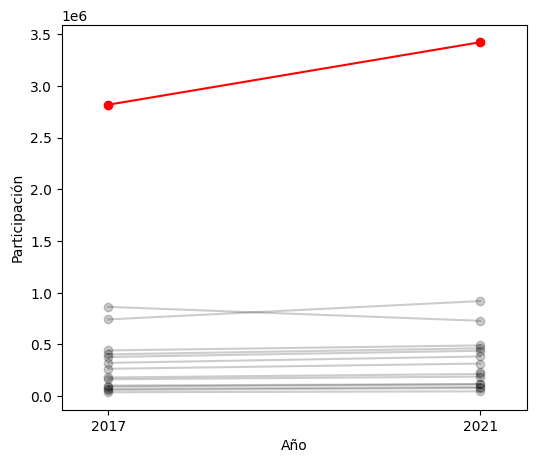

In [14]:
fig, ax = plt.subplots(1, 1, figsize = (6, 5))
for temp_iter in data_agg.groupby(["Región"]):
  temp_df = temp_iter[1]
  region = temp_iter[0][0]
  temp_df_2017 = temp_df[temp_df["Año"] == "2017"].copy()
  temp_df_2021 = temp_df[temp_df["Año"] == "2021"].copy()
  if region == 13:
    ax.plot(temp_df["Año"], temp_df["Participación efectiva"], alpha = 1, color = 'r')
    ax.scatter(temp_df["Año"], temp_df["Participación efectiva"], alpha = 1, color = 'r')
  else:
    ax.plot(temp_df["Año"], temp_df["Participación efectiva"], alpha = 0.2, color = 'k')
    ax.scatter(temp_df["Año"], temp_df["Participación efectiva"], alpha = 0.2, color = 'k')

  ax.set_xticks([2017, 2021])
  ax.set_xticklabels(["2017", "2021"])
  ax.set_xlim(2016.5, 2021.5)
  ax.set_xlabel("Año")
  ax.set_ylabel("Participación")


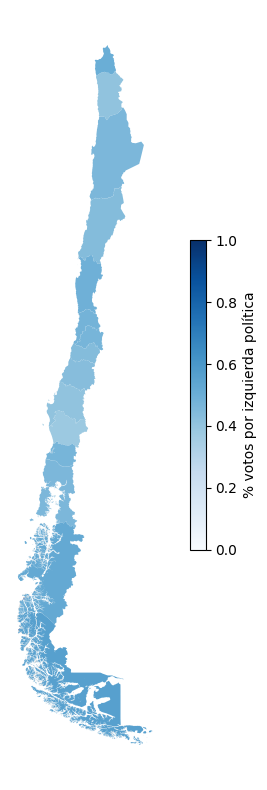

In [15]:
# https://github.com/niclabs/maps/blob/master/regiones
gdf = gpd.read_file("regiones/regiones.shp")
gdf['Región'] = gdf["COD_REGI"].astype(int)

gdf_2017 = gdf.merge(data_2017_agg, on = 'Región')

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf_2017.plot(column='% izquierda', ax=ax, legend=False,
                legend_kwds={'label': "% izquierda",
                             'orientation': "horizontal"},
                cmap='Blues', vmin=0, vmax=1)

#region_destacada = gdf_2017[gdf_2017['Región'] == 13]  # Cambia 'nombre' por el nombre real de la columna
#region_destacada.plot(ax=ax, color='red', edgecolor='black')

# Agregar el colorbar de forma manual
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=0, vmax=1))
sm.set_array([])  # Esto es para evitar un warning
cbar = fig.colorbar(sm, ax=ax, orientation='vertical', fraction=0.02, pad=0.04)
cbar.set_label('% votos por izquierda política')  # Etiqueta para el colorbar
ax.set_axis_off() #ocultar ejes originales

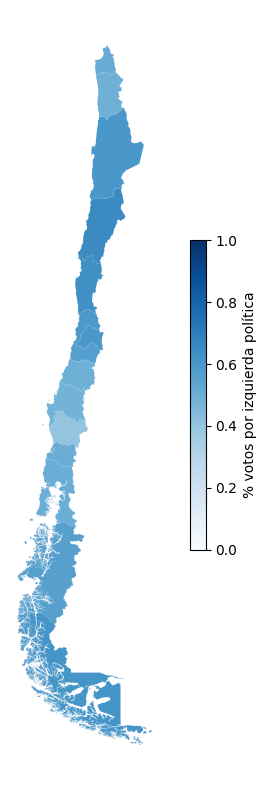

In [16]:
gdf_2021 = gdf.merge(data_2021_agg, on = 'Región')

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf_2021.plot(column='% izquierda', ax=ax, legend=False,
                legend_kwds={'label': "% izquierda",
                             'orientation': "horizontal"},
                cmap='Blues', vmin=0, vmax=1)

# Agregar el colorbar de forma manual
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=0, vmax=1))
sm.set_array([])  # Esto es para evitar un warning
cbar = fig.colorbar(sm, ax=ax, orientation='vertical', fraction=0.02, pad=0.04)
cbar.set_label('% votos por izquierda política')  # Etiqueta para el colorbar
ax.set_axis_off() #ocultar ejes originales

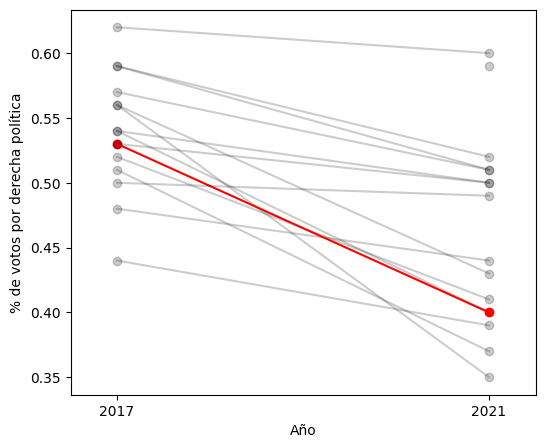

In [17]:
fig, ax = plt.subplots(1, 1, figsize = (6, 5))
for temp_iter in data_agg.groupby(["Región"]):
  temp_df = temp_iter[1]
  region = temp_iter[0][0]
  temp_df_2017 = temp_df[temp_df["Año"] == "2017"].copy()
  temp_df_2021 = temp_df[temp_df["Año"] == "2021"].copy()
  if region == 13:
    ax.plot(temp_df["Año"], temp_df["% derecha"], alpha = 1, color = 'r')
    ax.scatter(temp_df["Año"], temp_df["% derecha"], alpha = 1, color = 'r')

  else:
    ax.plot(temp_df["Año"], temp_df["% derecha"], alpha = 0.2, color = 'k')
    ax.scatter(temp_df["Año"], temp_df["% derecha"], alpha = 0.2, color = 'k')


  ax.set_xticks([2017, 2021])
  ax.set_xticklabels(["2017", "2021"])
  ax.set_xlim(2016.5, 2021.5)
  ax.set_xlabel("Año")
  ax.set_ylabel("% de votos por derecha política")